In [ ]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use(hep.style.LHCb2) # make our plots look good
from scipy.stats import crystalball
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.integrate import quad

In [ ]:
# Set global font size
plt.rc('font', size=14)          # controls default text size
plt.rc('axes', titlesize=16)     # fontsize of the title
plt.rc('axes', labelsize=13)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the y tick labels
plt.rc('legend', fontsize=14)    # fontsize of the legend

In [ ]:
#2016-2018 DDMD data
branches_cc = uproot.concatenate(['/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC16DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC17DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC18DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree'], expressions=('Lb_q2','Lb_M','Lb_DTF_L0_JPs_PV_M_0','Lb_DTF_L0_JPs_PV_Lambda0_pplus_ID_0'))

#2016-2018 DDMD data + bkg selection on Ks mass
array_cc = uproot.concatenate(['/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC16DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC17DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC18DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree', '/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Bd2KSJPsEE/MC16DDMD/Bd2KSJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Bd2KSJPsEE/MC17DDMD/Bd2KSJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree', '/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Bd2KSJPsEE/MC18DDMD/Bd2KSJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree'], expressions=('Pi_AtVtx_PE','P_AtVtx_P','Pi_AtVtx_PX','P_AtVtx_PX','Pi_AtVtx_PY','P_AtVtx_PY','Pi_AtVtx_PZ','P_AtVtx_PZ'))

#2016-2018 DDMD data  selection on Ks mass
array_c = uproot.concatenate(['/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC16DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC17DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Lb2LJPsEE/MC18DDMD/Lb2LJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree'], expressions=('Pi_AtVtx_PE','P_AtVtx_P','Pi_AtVtx_PX','P_AtVtx_PX','Pi_AtVtx_PY','P_AtVtx_PY','Pi_AtVtx_PZ','P_AtVtx_PZ'))

#2016-2018 DDMD only MC background  selection on Ks mass
array_b = uproot.concatenate(['/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Bd2KSJPsEE/MC16DDMD/Bd2KSJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Bd2KSJPsEE/MC17DDMD/Bd2KSJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree', '/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/Bd2KSJPsEE/MC18DDMD/Bd2KSJPsEE_procTuple.root:Lb2JpsiL_eeTuple/DecayTree'], expressions=('Pi_AtVtx_PE','P_AtVtx_P','Pi_AtVtx_PX','P_AtVtx_PX','Pi_AtVtx_PY','P_AtVtx_PY','Pi_AtVtx_PZ','P_AtVtx_PZ'))


In [ ]:
mass_K0_cc = np.sqrt(np.square(array_cc['Pi_AtVtx_PE']
                           +np.sqrt(np.square(139.57)
                                    +np.square(array_cc['P_AtVtx_P'])))
                 - np.square(array_cc['Pi_AtVtx_PX'] +
                             array_cc['P_AtVtx_PX'])
                 - np.square(array_cc['Pi_AtVtx_PY']
                             +array_cc['P_AtVtx_PY'])
                 -np.square(array_cc['Pi_AtVtx_PZ']+array_cc['P_AtVtx_PZ']))

mass_K0_c = np.sqrt(np.square(array_c['Pi_AtVtx_PE']
                           +np.sqrt(np.square(139.57)
                                    +np.square(array_c['P_AtVtx_P'])))
                 - np.square(array_c['Pi_AtVtx_PX'] +
                             array_c['P_AtVtx_PX'])
                 - np.square(array_c['Pi_AtVtx_PY']
                             +array_c['P_AtVtx_PY'])
                 -np.square(array_c['Pi_AtVtx_PZ']+array_c['P_AtVtx_PZ']))

mass_K0_b = np.sqrt(np.square(array_b['Pi_AtVtx_PE']
                           +np.sqrt(np.square(139.57)
                                    +np.square(array_b['P_AtVtx_P'])))
                 - np.square(array_b['Pi_AtVtx_PX'] +
                             array_b['P_AtVtx_PX'])
                 - np.square(array_b['Pi_AtVtx_PY']
                             +array_b['P_AtVtx_PY'])
                 -np.square(array_b['Pi_AtVtx_PZ']+array_b['P_AtVtx_PZ']))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(mass_K0_cc, bins=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('see')
plt.show()


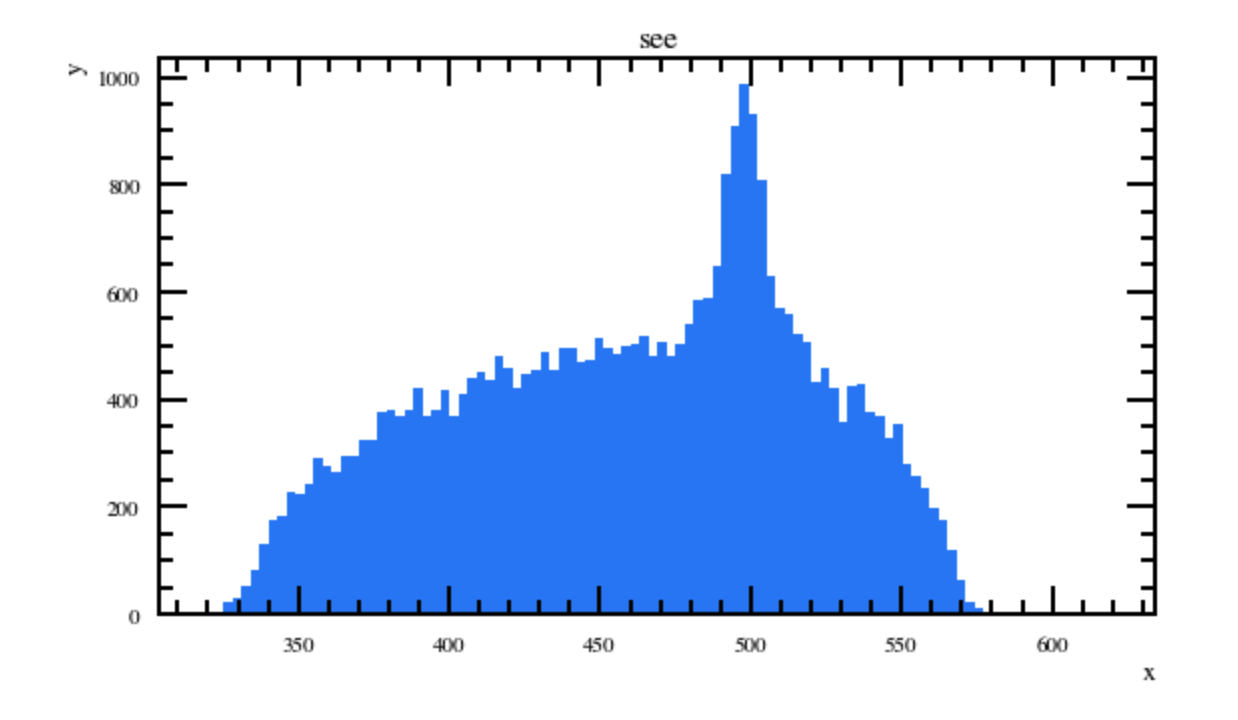

In [ ]:
data= mass_K0_cc

min_x = 300
max_x = 600
n_bins = 75




plt.figure(figsize=(8,6))
plt.hist(mass_K0_b, bins=75,range = (300,600), alpha=0.7, histtype='step', color='blue',label='$B^{0} -> J/\psi K_{s}^{0}$',fill=False)


plt.xlabel('MeV')
plt.ylabel('n events')
plt.legend(loc='best',framealpha=0.9, title='MC DDMD data 2016-2018', title_fontsize='16', prop={'size': 14})

#plt.axvline(x=497.12652486087,color='black', linewidth=1, linestyle="--")
#plt.axvline(x=510.2,color='black', linewidth=1, linestyle="--")
#plt.axvline(x=483.8,color='black', linewidth=1, linestyle="--")

plt.xlabel(r'$K^{0}_{s}$ mass [MeV/$c^2$]')
plt.ylabel('Number of events per 4 MeV/$c^2$')

plt.show()


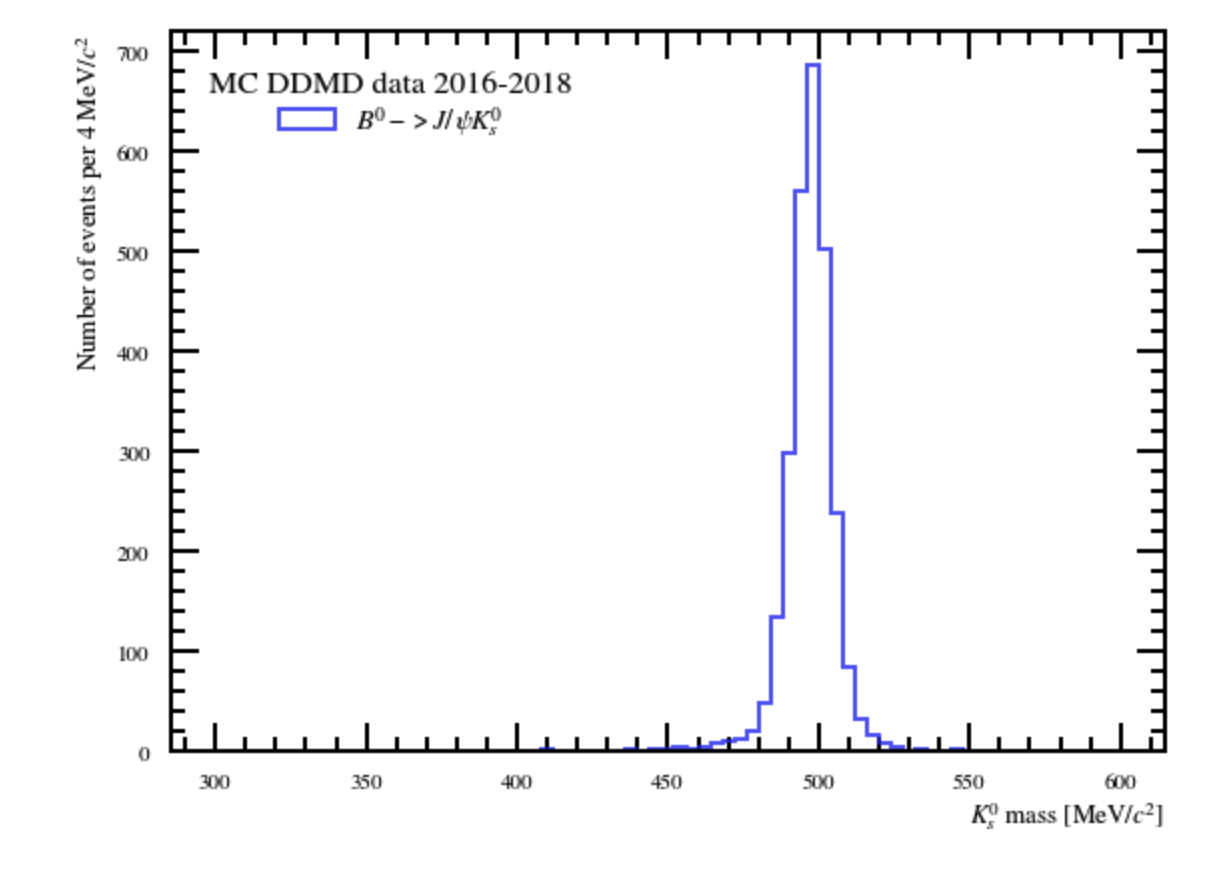

In [ ]:
#I'm building ranges centered at the np.mean(mass_K0_b)= 497.12652486087
#where np.std(mass_K0_b)=6.5
#I'm using 6.5/3 = 2.2 width between ranges

number_up=np.arange(499.2, 596.2, 2.2)
print(number_up)
number_d=np.arange(398,495,2.2)
#I need 494.8 as first value
number_down = np.sort(number_d)[::-1]
print(number_down)

if len(number_up) != len(number_down):
    raise ValueError("number_up and number_down must have the same length")


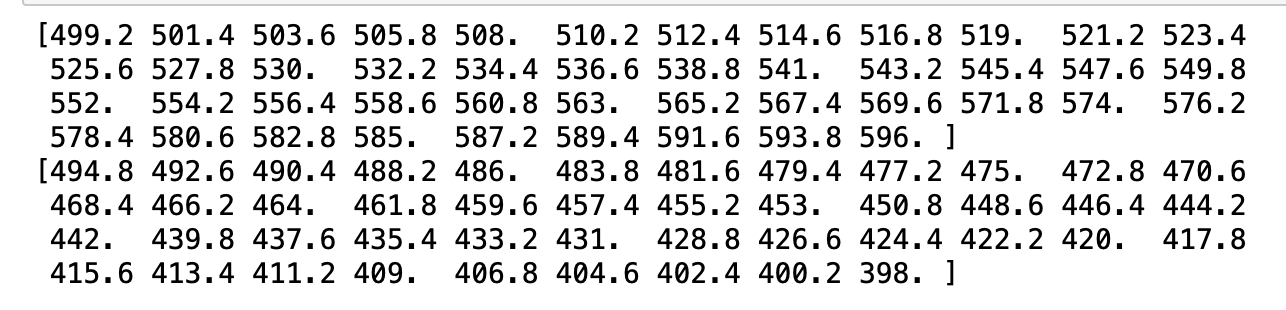

In [ ]:
# background acceptance
background_left = []


for pair in rounded_paired_elements:
    count_up = mass_K0_b > pair[0]
    count_down = mass_K0_b < pair[1]
    result = np.sum(mass_K0_b[count_up|count_down])
    background_left.append(result)

if len(number_up) != len(background_left):
    raise ValueError("number_up and number_down must have the same length")


In [ ]:
print(background_left)
#check consistency of result
up= mass_K0_b > 499.2
down = mass_K0_b < 494.8
np.sum(mass_K0_b[up|down])

In [ ]:
tot_background =np.sum(mass_K0_b)
background_acceptance=background_left/tot_background
print(background_acceptance)
print(tot_background)

In [ ]:
# signal efficiency
signal_left = []


for pair in rounded_paired_elements:
    count_up = mass_K0_c> pair[0]
    count_down = mass_K0_c< pair[1]
    result = np.sum(mass_K0_c[count_up|count_down])
    signal_left.append(result)

if len(number_up) != len(signal_left):
    raise ValueError("number_up and number_down must have the same length")

In [ ]:
print(signal_left)
#check consistency of result
up = mass_K0_c > 499.2
down = mass_K0_c < 494.8
np.sum(mass_K0_c[up|down])

In [ ]:
tot_signal = np.sum(mass_K0_c)
signal_efficiency= signal_left/tot_signal
print(signal_efficiency)

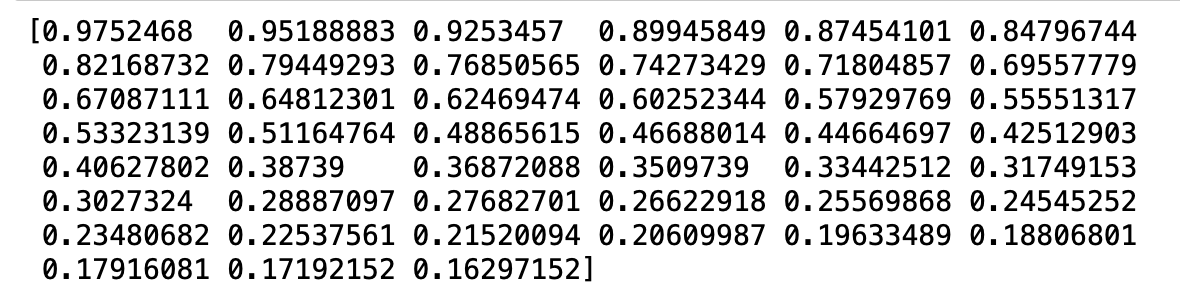

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(background_acceptance, signal_efficiency)
plt.scatter(background_acceptance, signal_efficiency, color='black',s=50)
plt.scatter(7.76517248e-02,0.84796744, color='red', s=50)
plt.xlabel(r'Background acceptance [$\times 10^{-1}$]')
plt.ylabel('Signal efficiency')
plt.title('Chosen range [483.8, 510.2]')
plt.grid(True)
plt.show()

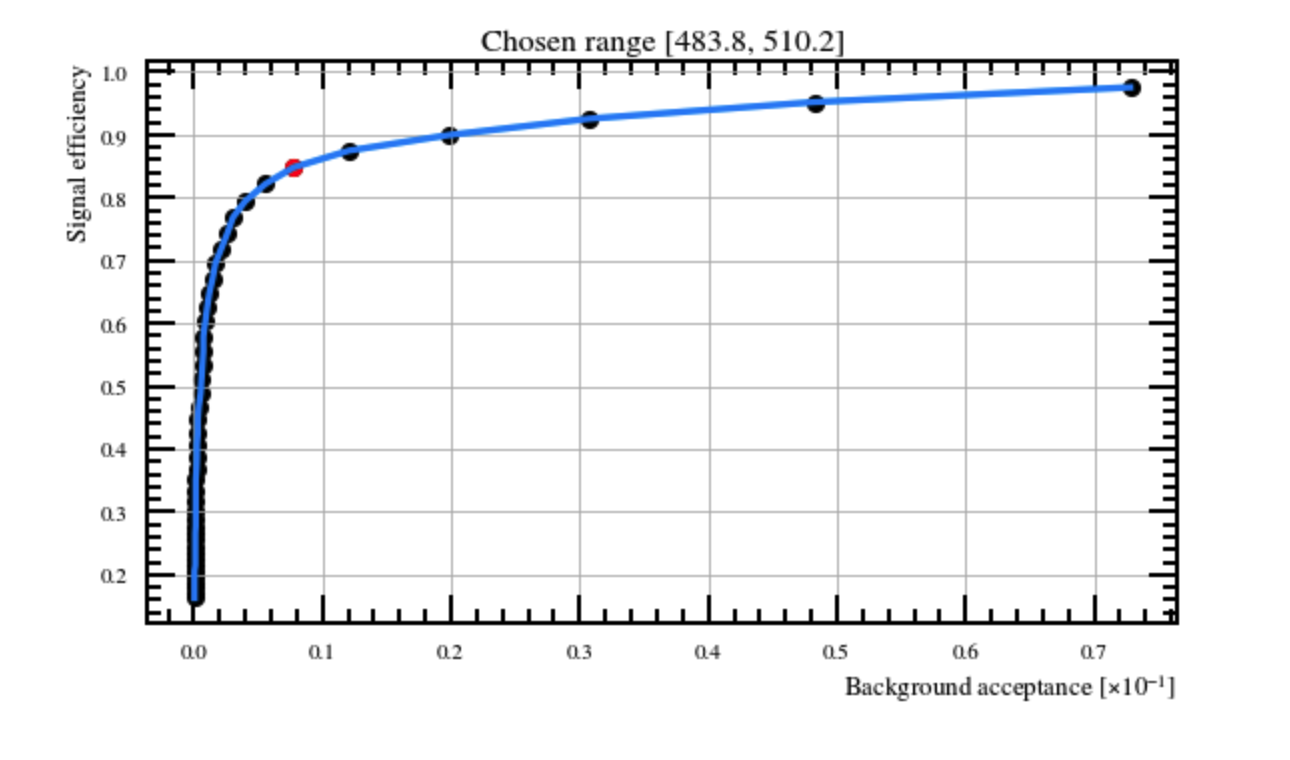

In [ ]:
slope < 1 = increasing the background acceptance leads to diminishing returns in terms of signal efficiency.

In [ ]:
fom_values = signal_efficiency/background_acceptance
print(signal_efficiency)
print(background_acceptance)
print(fom_values)

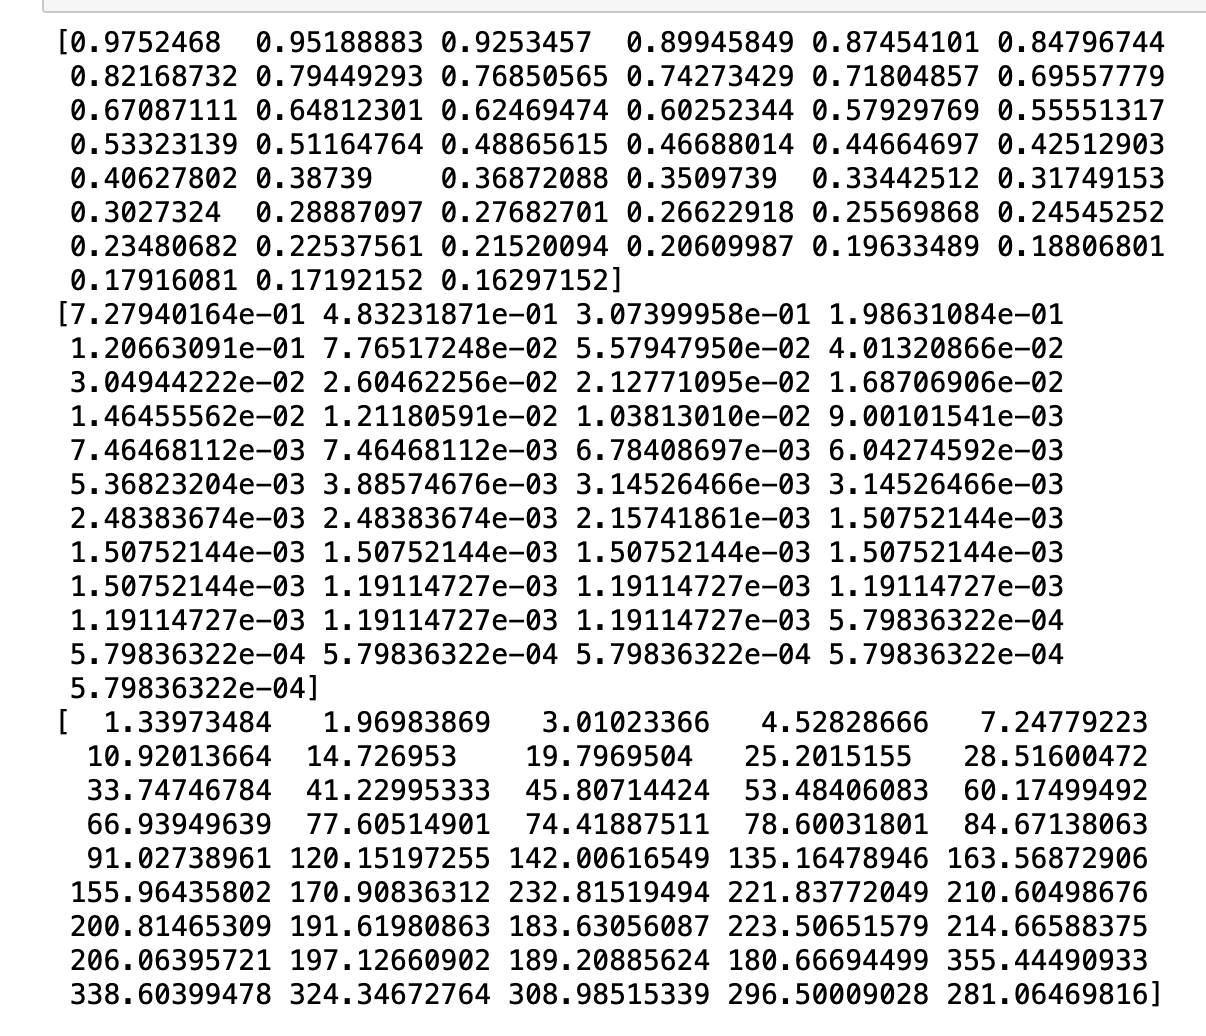

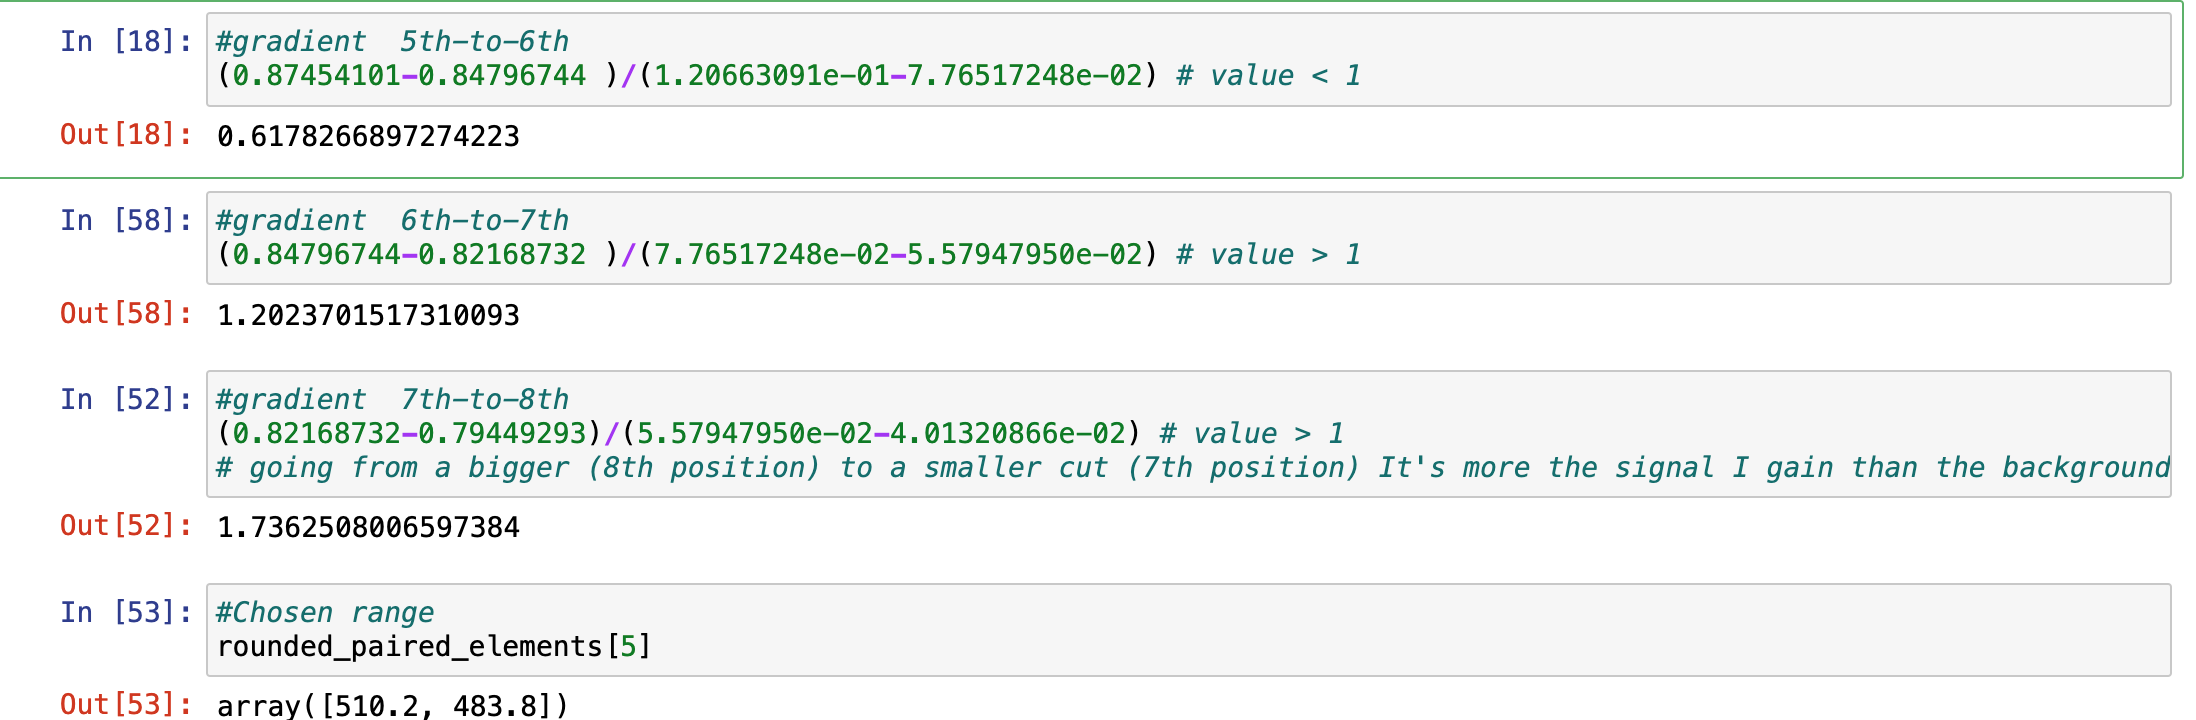